In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from datasets import create_dataset
from utils import parse_configuration
from model import FaceNet
import cv2
import matplotlib.pyplot as plt
params = parse_configuration('./config.json')
train_ds,val_ds = create_dataset(**params['train_dataset_params'])

torch.Size([30])


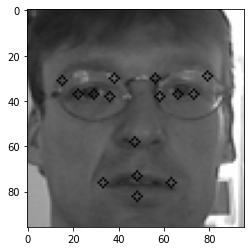

In [27]:
m_state_dict = torch.load('model.pt')
model = FaceNet(15).double()
model.load_state_dict(m_state_dict)
for image , label in val_ds:
    image = torch.unsqueeze(image[0],dim=0)
pred = model(image)[0]
print(pred.shape)
image = image[0,0].numpy()
for i in range(15):
    x = int(torch.round((pred[i*2])).item())
    y = int(torch.round((pred[i*2+1])).item())
    image = cv2.circle(image,[x,y],2,color=(0, 0, 255))

plt.imshow(image,cmap='gray')